In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
df = pd.read_csv('recipes.csv')
df

,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed,CaffeineAmount,CaffeinepercentOfDailyNeed
0,0,True,True,True,False,1.0,3,633998,Banana Blueberry Pancakes,55.79,...,0.49,2.44,0.03,2.26,18.11,1.81,NaN,NaN,NaN,NaN
1,1,True,True,False,False,0.0,1,634426,Basil and Orange Confit Compound Butter,15.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,False,False,False,False,3.0,1,635085,Black Bottom Banana Bars,78.85,...,2.63,13.13,0.32,21.09,100.80,10.08,0.28,1.53,9.89,3.30
3,3,True,False,True,False,2.0,1,663229,The Best Raw Chocolate Chip Cookies,54.64,...,0.65,3.26,0.10,6.47,26.79,2.68,NaN,NaN,NaN,NaN
4,4,False,True,False,False,31.0,3,651437,Mediterranean Spinach Artichoke Dip,115.26,...,0.66,3.29,0.07,4.64,162.84,16.28,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,False,True,True,False,18.0,13,638315,"Chicken Sausage, White Bean and Cabbage Soup",196.23,...,0.53,2.67,0.15,10.23,102.67,10.27,NaN,NaN,NaN,NaN
146,146,True,False,False,False,1.0,2,656248,Pinot Noir Brownies,65.76,...,0.21,1.07,0.03,1.68,19.82,1.98,2.48,13.76,10.69,3.56
147,147,True,True,True,True,93.0,2,637297,Cauliflower Chickpea Stew,139.28,...,4.77,23.83,0.45,29.70,141.16,14.12,NaN,NaN,NaN,NaN
148,148,True,True,False,False,5.0,1,659412,Sautéed Balsamic Green Beans With Cherry Tomatoes,101.81,...,1.15,5.73,0.12,7.85,55.64,5.56,NaN,NaN,NaN,NaN


###### 1.Print the names of Columns that have null values

In [2]:
# total columns with null values
len(df.columns[df.isna().any()].tolist())

48

In [3]:
#calumn names with null values
df.columns[df.isna().any()].tolist()

['FiberAmount',
 'FiberpercentOfDailyNeed',
 'VitaminB6Amount',
 'VitaminB6percentOfDailyNeed',
 'ManganeseAmount',
 'ManganesepercentOfDailyNeed',
 'SeleniumAmount',
 'SeleniumpercentOfDailyNeed',
 'PotassiumAmount',
 'PotassiumpercentOfDailyNeed',
 'VitaminB2Amount',
 'VitaminB2percentOfDailyNeed',
 'VitaminCAmount',
 'VitaminCpercentOfDailyNeed',
 'PhosphorusAmount',
 'PhosphoruspercentOfDailyNeed',
 'FolateAmount',
 'FolatepercentOfDailyNeed',
 'VitaminB5Amount',
 'VitaminB5percentOfDailyNeed',
 'MagnesiumAmount',
 'MagnesiumpercentOfDailyNeed',
 'IronAmount',
 'IronpercentOfDailyNeed',
 'VitaminKAmount',
 'VitaminKpercentOfDailyNeed',
 'CopperAmount',
 'CopperpercentOfDailyNeed',
 'VitaminAAmount',
 'VitaminApercentOfDailyNeed',
 'VitaminB12Amount',
 'VitaminB12percentOfDailyNeed',
 'VitaminDAmount',
 'VitaminDpercentOfDailyNeed',
 'ZincAmount',
 'ZincpercentOfDailyNeed',
 'VitaminEAmount',
 'VitaminEpercentOfDailyNeed',
 'VitaminB3Amount',
 'VitaminB3percentOfDailyNeed',
 'Vitami

###### 2. Print the recipes with the highest number of aggregateLikes

In [4]:
df[df['aggregateLikes']==df['aggregateLikes'].max()]

,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed,CaffeineAmount,CaffeinepercentOfDailyNeed
50,50,False,True,True,False,4.0,16911,715419,Slow Cooker Spicy Hot Wings,101.43,...,7.42,37.09,0.08,5.0,44.21,4.42,NaN,NaN,NaN,NaN


###### 3.Handle the missing values of “calcium percent of Daily need”. Sort the resulting DataFrame by id column.

In [5]:
# count total cells with NaN in the column
df['CalciumpercentOfDailyNeed'].isna().sum() 

8

In [6]:
# calculate mean
meanCalciumPercent = df['CalciumpercentOfDailyNeed'].mean()
meanCalciumPercent

12.256690140845066

In [7]:
# assign the mean to the missing values in the column
df['CalciumpercentOfDailyNeed']=df['CalciumpercentOfDailyNeed'].fillna(meanCalciumPercent)

In [8]:
# total mean of the column doesn't change after replacing NaN with mean
df['CalciumpercentOfDailyNeed'].mean()

12.256690140845064

In [9]:
# here the output should be zero, because we replaced NaN with mean
df['CalciumpercentOfDailyNeed'].isna().sum()


0

In [10]:
#sort the dataframe by column by id
df1 = df.sort_values(by=['id'])
df1

,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed,CaffeineAmount,CaffeinepercentOfDailyNeed
83,83,False,False,False,False,5.0,0,45945,Oeufs En Meurette,209.85,...,1.51,7.56,0.15,10.13,124.54,12.45,NaN,NaN,NaN,NaN
43,43,False,False,False,False,44.0,1,622825,Tortilla Burger Loco Vaca,407.86,...,12.82,64.12,0.35,23.42,281.97,28.20,NaN,NaN,NaN,NaN
104,104,False,False,False,False,4.0,1,631769,"Bad Boy"" Giant Double Chocolate Cookies",44.08,...,1.73,8.63,0.20,13.42,64.05,6.41,NaN,NaN,34.04,11.35
95,95,False,True,True,False,9.0,1,632084,Allergy-Free Stuffed Portobello Mushrooms,138.47,...,4.59,22.96,0.09,6.05,28.08,2.81,NaN,NaN,NaN,NaN
52,52,False,False,False,False,2.0,16,632101,Almond Butter and Chocolate Squares,92.26,...,0.81,4.04,0.04,2.51,86.99,8.70,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,134,True,True,True,True,77.0,1,1096268,Garlic-Roasted Brussels Sprouts Side Dish,170.34,...,1.23,6.13,0.23,15.57,83.41,8.34,NaN,NaN,NaN,NaN
30,30,True,True,True,False,17.0,1,1096306,Vegan Chana Masala Curry,165.89,...,2.14,10.71,0.20,13.09,154.27,15.43,NaN,NaN,NaN,NaN
118,118,False,True,True,False,38.0,1,1096323,Potato & Leek Soup with Roasted Beets,244.08,...,2.43,12.15,0.10,6.47,101.41,10.14,NaN,NaN,NaN,NaN
39,39,True,True,True,False,7.0,6,1098357,Three Ingredient Frozen Pina Colada,214.60,...,1.05,5.25,0.19,12.66,52.87,5.29,13.36,74.22,NaN,NaN


###### 4.Delete the columns that have null values == 141

In [11]:
# count number of columns with null values == 141
(df1.isnull().sum()==141).sum()

2

In [12]:
df2 = df1[df1.columns[df1.isnull().sum() != 141]]
df2

,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminEAmount,VitaminEpercentOfDailyNeed,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed
83,83,False,False,False,False,5.0,0,45945,Oeufs En Meurette,209.85,...,0.84,5.61,1.51,7.56,0.15,10.13,124.54,12.45,NaN,NaN
43,43,False,False,False,False,44.0,1,622825,Tortilla Burger Loco Vaca,407.86,...,4.61,30.71,12.82,64.12,0.35,23.42,281.97,28.20,NaN,NaN
104,104,False,False,False,False,4.0,1,631769,"Bad Boy"" Giant Double Chocolate Cookies",44.08,...,0.53,3.52,1.73,8.63,0.20,13.42,64.05,6.41,NaN,NaN
95,95,False,True,True,False,9.0,1,632084,Allergy-Free Stuffed Portobello Mushrooms,138.47,...,1.08,7.19,4.59,22.96,0.09,6.05,28.08,2.81,NaN,NaN
52,52,False,False,False,False,2.0,16,632101,Almond Butter and Chocolate Squares,92.26,...,3.98,26.52,0.81,4.04,0.04,2.51,86.99,8.70,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,134,True,True,True,True,77.0,1,1096268,Garlic-Roasted Brussels Sprouts Side Dish,170.34,...,4.40,29.33,1.23,6.13,0.23,15.57,83.41,8.34,NaN,NaN
30,30,True,True,True,False,17.0,1,1096306,Vegan Chana Masala Curry,165.89,...,3.34,22.26,2.14,10.71,0.20,13.09,154.27,15.43,NaN,NaN
118,118,False,True,True,False,38.0,1,1096323,Potato & Leek Soup with Roasted Beets,244.08,...,1.31,8.76,2.43,12.15,0.10,6.47,101.41,10.14,NaN,NaN
39,39,True,True,True,False,7.0,6,1098357,Three Ingredient Frozen Pina Colada,214.60,...,NaN,NaN,1.05,5.25,0.19,12.66,52.87,5.29,13.36,74.22


###### 5.Print the title of the recipes that are vegetarian == TRUE and glutenFree == True

In [13]:

df2[(df2['vegetarian'] == True) & (df2['glutenFree'] == True) ].title.tolist()


['Banana Blueberry Pancakes',
 'Basil and Orange Confit Compound Butter',
 'Beet Slaw',
 'Blender Carrot Soup',
 'Blueberry Mojito Popsicles',
 'Breakfast Porridge',
 'Butternut Squash Soup',
 'Cauliflower Chickpea Stew',
 'Cherries and Yogurt Parfait',
 'Dandelion pesto',
 'Detox Orange Carrot Juice',
 'Easy Eggplant Parmesan',
 'EASY, CUMIN-LENTIL SPREAD',
 'Fire Roasted Tomato Chutney',
 'Fried Brown Rice',
 'Green Beans with Garlic Chips',
 'Indian-Style Dill and Turmeric Potato Salad',
 'Japanese Cucumber Salad',
 'Kappa Maki',
 'Layered Greek Salad',
 'Luscious Palak Paneer',
 'Mango Cranberry Sherbet',
 'Nutty Rice',
 'Peach Coconut Ice Cream',
 'Peanut Butter Cookies with Flax Seeds and Chocolate',
 'Roasted Asparagus with Egg Salad',
 'Roasted Strawberry Coconut Milk Ice Cream',
 'Sautéed Balsamic Green Beans With Cherry Tomatoes',
 'Sautéed Balsamic Green Beans With Cherry Tomatoes',
 'Seasonal Autumn Stew',
 'Spicy Carrot Amaranth Soup',
 'Stir Fried Cabbage and Tomatoes',
 

###### 6. How many vegan recipes are there (Vegan = Vegetarian and dairy free)?

In [14]:
len(df2[(df2['vegetarian'] == True) & (df2['dairyFree'] == True) ].title.tolist())

29

###### 7. Compare the average amount of Vitamin B12 for the vegan and non-vegan recipes. How reliable are the results?

In [15]:
# average of B12 for vagan
df2[df2['vegetarian'] == True]['VitaminB12Amount'].mean()

0.48357142857142865

In [16]:
# average of B12 for non-vagan
df2[df2['vegetarian'] == False]['VitaminB12Amount'].mean()

1.2353846153846157

###### 8.Compare the average health Score for both types of recipes (vegan vs non-vegan).

In [17]:
# average health score for vagan
df2[df2['vegetarian'] == True]['healthScore'].mean()

18.484848484848484

In [18]:
# average health score for non-vagan
df2[df2['vegetarian'] == False]['healthScore'].mean()

22.107142857142858

###### 9.Create a new column: "VeganWeek" where you decrease the price of vegan products by 10%, but only if they already cost more than 100.



In [19]:
df2['VeganWeek']=df2[(df2['pricePerServing'] > 100) & (df2['vegetarian'] == True)]['pricePerServing']*0.9

<ipython-input-19-74ebd97b6361>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['VeganWeek']=df2[(df2['pricePerServing'] > 100) & (df2['vegetarian'] == True)]['pricePerServing']*0.9


In [20]:
df2[['title','pricePerServing','VeganWeek','vegetarian']]

,title,pricePerServing,VeganWeek,vegetarian
83,Oeufs En Meurette,209.85,NaN,False
43,Tortilla Burger Loco Vaca,407.86,NaN,False
104,"Bad Boy"" Giant Double Chocolate Cookies",44.08,NaN,False
95,Allergy-Free Stuffed Portobello Mushrooms,138.47,NaN,False
52,Almond Butter and Chocolate Squares,92.26,NaN,False
...,...,...,...,...
134,Garlic-Roasted Brussels Sprouts Side Dish,170.34,153.306,True
30,Vegan Chana Masala Curry,165.89,149.301,True
118,Potato & Leek Soup with Roasted Beets,244.08,NaN,False
39,Three Ingredient Frozen Pina Colada,214.60,193.140,True


###### 10.Among the non-vegan recipes, find the one requiring most time to prepare. How is it called?

In [21]:
df2[(df2['readyInMinutes']==df2['readyInMinutes'].max())&(df2['vegetarian'] == False)][['title','readyInMinutes','vegetarian','pricePerServing']]

,title,readyInMinutes,vegetarian,pricePerServing
83,Oeufs En Meurette,328,False,209.85


###### 11.Build a model using linear regression on this dataset

In [22]:
data = df2[['pricePerServing','CaloriesAmount']]
data

,pricePerServing,CaloriesAmount
83,209.85,251.21
43,407.86,1114.97
104,44.08,358.82
95,138.47,87.75
52,92.26,359.16
...,...,...
134,170.34,265.27
30,165.89,482.98
118,244.08,150.35
39,214.60,320.34


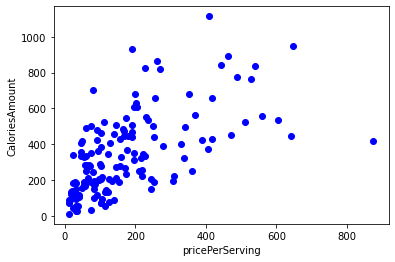

In [23]:
plt.scatter(data['pricePerServing'] , data['CaloriesAmount'] , color='blue')
plt.xlabel('pricePerServing')
plt.ylabel('CaloriesAmount')
plt.show()

In [24]:
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]

In [25]:
# Modeling:
# Using sklearn package to model data :
regr = linear_model.LinearRegression()
train_x = np.array(train[['pricePerServing']])
train_y = np.array(train[['CaloriesAmount']])
regr.fit(train_x,train_y)

LinearRegression()

In [26]:
# The coefficients:
print ('coefficients :' ,regr.coef_) #Slope
print ('Intercept : ',regr.intercept_) #Intercept

coefficients : [[0.88678046]]
Intercept :  [185.91146041]


Text(0, 0.5, 'Calories')

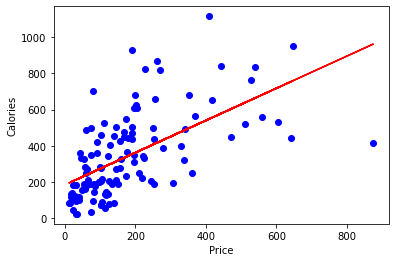

In [27]:
# Plotting the regression line:
plt.scatter(train['pricePerServing'], train['CaloriesAmount'], color='blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel('Price')
plt.ylabel('Calories')

In [28]:
# Predicting values:
# Function for predicting future values :
def get_regression_predictions(input_features,intercept,slope):
 predicted_values = input_features*slope + intercept
 return predicted_values

In [29]:
# Predicting calories for a price:
my_price = 100
estimatd_calories = get_regression_predictions(my_price,regr.intercept_[0],regr.coef_[0][0])
print ('Estimated Calories :',estimatd_calories)

Estimated Calories : 274.58950612977185


In [30]:
# Checking various accuracy:
from sklearn.metrics import r2_score
test_x = np.array(test[['pricePerServing']])
test_y = np.array(test[['CaloriesAmount']])
test_y_ = regr.predict(test_x)

In [31]:
print('Mean absolute error: %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('Mean sum of squares (MSE): %.2f' % np.mean((test_y_ - test_y) ** 2))
print('R2-score: %.2f' % r2_score(test_y_ , test_y) )

Mean absolute error: 134.48
Mean sum of squares (MSE): 22567.57
R2-score: -0.38
